# Box and Whisker Plots
### Notes:
- Last updated 3/29 11pm

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Get counties
top_county_file = "Zillow CSV results/top_counties_Sale_List_Ratio.csv"
top_county_df = pd.read_csv(top_county_file, encoding="latin")
bottom_county_file = "Zillow CSV results/bottom_counties_Sale_List_Ratio.csv"
bottom_county_df = pd.read_csv(bottom_county_file, encoding="latin")

In [3]:
# Clean up counties (Top)

top_county_df['RegionName'] = top_county_df['RegionName'].str.replace(" County", "")
top_county_df['County'] = top_county_df['RegionName'] + ", " + top_county_df['StateName']

top_county_clean = top_county_df[['County']]
top_county_clean = top_county_clean.iloc[::-1].reset_index(drop=True)

In [4]:
# Clean up counties (Bottom)
bottom_county_df['RegionName'] = bottom_county_df['RegionName'].str.replace(" County", "")
bottom_county_df['County'] = bottom_county_df['RegionName'] + ", " + bottom_county_df['StateName']

bottom_county_clean = bottom_county_df[['County']]

In [5]:
# Get health factor data and clean up
health_factor_path = "raw data/2018_all_county_data_1.csv"
health_factor_df = pd.read_csv(health_factor_path, encoding="latin")

health_factor_df["State"] = health_factor_df["State"].replace({'Alabama' : 'AL', 'Alaska' : 'AK', 'Arizona' : 'AZ', 'Arkansas' : 'AR', 'California' : 'CA', 'Colorado' : 'CO', 'Connecticut' : 'CT', 'Delaware' : 'DE', 'Florida' : 'FL', 'Georgia' : 'GA', 'Hawaii' : 'HI', 'Idaho' : 'ID', 'Illinois' : 'IL', 'Indiana' : 'IN', 'Iowa' : 'IA', 'Kansas' : 'KS', 'Kentucky' : 'KY', 'Louisiana' : 'LA', 'Maine' : 'ME', 'Maryland' : 'MD', 'Massachusetts' : 'MA', 'Michigan' : 'MI', 'Minnesota' : 'MN', 'Mississippi' : 'MS', 'Missouri' : 'MO', 'Montana' : 'MT', 'Nebraska' : 'NE', 'Nevada' : 'NV', 'New Hampshire' : 'NH', 'New Jersey' : 'NJ', 'New Mexico' : 'NM', 'New York' : 'NY', 'North Carolina' : 'NC', 'North Dakota' : 'ND', 'Ohio' : 'OH', 'Oklahoma' : 'OK', 'Oregon' : 'OR', 'Pennsylvania' : 'PA', 'Rhode Island' : 'RI', 'South Carolina' : 'SC', 'South Dakota' : 'SD', 'Tennessee' : 'TN', 'Texas' : 'TX', 'Utah' : 'UT', 'Vermont' : 'VT', 'Virginia' : 'VA', 'Washington' : 'WA', 'West Virginia' : 'WV', 'Wisconsin' : 'WI', 'Wyoming' : 'WY'})
health_factor_df['County'] = health_factor_df["County"] + ", " + health_factor_df["State"]

# PCP Rate
primary care physician per 100,000 population

In [6]:
# Get specific health factor data

PCP_rate = health_factor_df[["County", "PCP Rate"]]

In [7]:
# Make merge for plotting
top_PCP = pd.merge(top_county_clean, PCP_rate, on='County', how='left')
bottom_PCP = pd.merge(bottom_county_clean, PCP_rate, on='County', how='left')
all_PCP = pd.merge(bottom_PCP, top_PCP, on=['County','PCP Rate'],how='outer')


<BarContainer object of 20 artists>

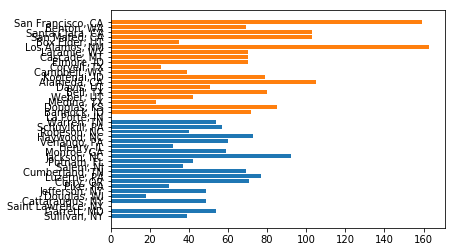

In [8]:
# Plot
plt.barh(bottom_PCP['County'], bottom_PCP['PCP Rate'])
plt.barh(top_PCP['County'], top_PCP['PCP Rate'])

# Dentist Rate
dentist per 100,000 population

In [9]:
# Get specific health factor data

dentist_rate_df = health_factor_df[["County", "Dentist Rate"]]

In [10]:
# Make merge for plotting
top_dentist = pd.merge(top_county_clean, dentist_rate_df, on='County', how='left')
bottom_dentist = pd.merge(bottom_county_clean, dentist_rate_df, on='County', how='left')
all_dentist = pd.merge(bottom_dentist, top_dentist, on=['County','Dentist Rate'],how='outer')


<BarContainer object of 20 artists>

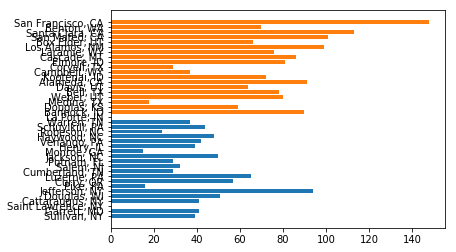

In [11]:
# Plot

plt.barh(bottom_dentist['County'], bottom_dentist['Dentist Rate'])

plt.barh(top_dentist['County'], top_dentist['Dentist Rate'])

# MHP Rate
mental health provider per 100,000 population

In [12]:
# Get specific health factor data

MHP_rate = health_factor_df[["County", "MHP Rate"]]


In [13]:
# Make merge for plotting
top_MHP = pd.merge(top_county_clean, MHP_rate, on='County', how='left')
bottom_MHP = pd.merge(bottom_county_clean, MHP_rate, on='County', how='left')
all_MHP = pd.merge(bottom_MHP, top_MHP, on=['County','MHP Rate'],how='outer')


<BarContainer object of 20 artists>

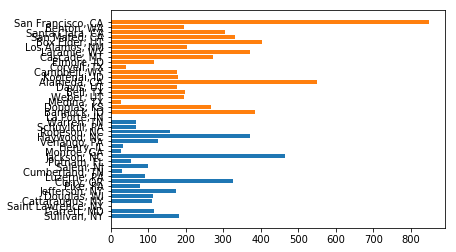

In [14]:
# Plot

plt.barh(bottom_MHP['County'], bottom_MHP['MHP Rate'])

plt.barh(top_MHP['County'], top_MHP['MHP Rate'])

# Box and whisker

In [15]:
# Remove rows with NaN
trim_bottom_MHP = bottom_MHP.dropna()
trim_bottom_dentist = bottom_dentist.dropna()
trim_bottom_PCP = bottom_PCP.dropna()
trim_top_MHP = top_MHP.dropna()
trim_top_dentist = top_dentist.dropna()
trim_top_PCP = top_PCP.dropna()

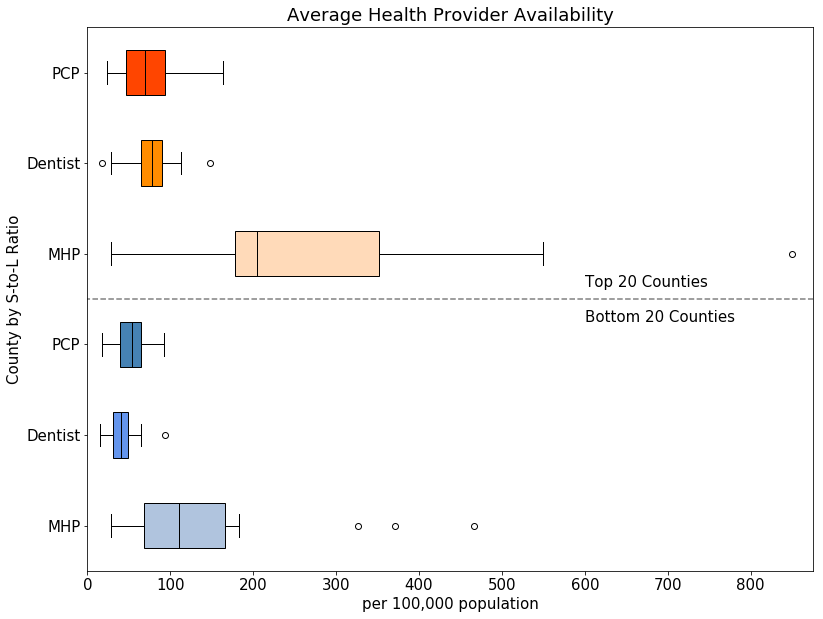

In [16]:

all_data = [trim_bottom_MHP['MHP Rate'], trim_bottom_dentist['Dentist Rate'], trim_bottom_PCP['PCP Rate'],
            trim_top_MHP['MHP Rate'],  trim_top_dentist['Dentist Rate'], trim_top_PCP['PCP Rate']]
plt.figure(figsize=(13,10))  
plt.rcParams.update({'font.size': 15})
boxplot = plt.boxplot(all_data, vert=False, patch_artist=True,labels=['MHP','Dentist','PCP','MHP', 'Dentist', 'PCP'])

colors = ['lightsteelblue', 'cornflowerblue', 'steelblue', 'peachpuff', 'darkorange', 'orangered']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
plt.setp(boxplot['medians'], color='black')    


plt.ylabel('County by S-to-L Ratio')
plt.text(600, 3.25, 'Top 20 Counties \n\nBottom 20 Counties')

plt.hlines(3.5, -100, 875, linestyles='dashed', colors='grey')
plt.xlabel('per 100,000 population')
plt.title('Average Health Provider Availability')
plt.yticks()
plt.xlim(0,875)

plt.savefig("Plots/boxplot_health_providers_by_sale_list_ratio.png")

(array([1, 2, 3, 4, 5, 6]), <a list of 6 Text yticklabel objects>)

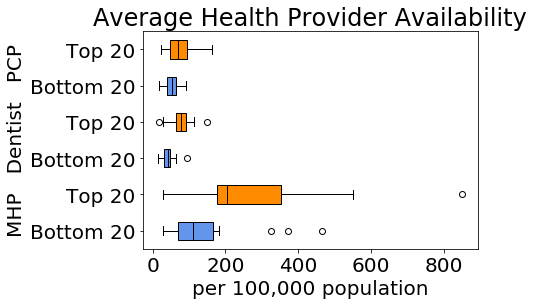

In [17]:

all_data = [trim_bottom_MHP['MHP Rate'], trim_top_MHP['MHP Rate'], 
            trim_bottom_dentist['Dentist Rate'], trim_top_dentist['Dentist Rate'], 
            trim_bottom_PCP['PCP Rate'], trim_top_PCP['PCP Rate']]
plt.rcParams.update({'font.size': 20})
boxplot = plt.boxplot(all_data, vert=False, patch_artist=True,labels=['Bottom 20','Top 20','Bottom 20','Top 20','Bottom 20','Top 20'])


colors = ['cornflowerblue', 'darkorange', 'cornflowerblue', 'darkorange', 'cornflowerblue', 'darkorange']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
plt.setp(boxplot['medians'], color='black')    
plt.ylabel('MHP   Dentist   PCP')
plt.xlabel('per 100,000 population')
plt.title('Average Health Provider Availability')
plt.yticks()
# plt.xlim(-15,875)

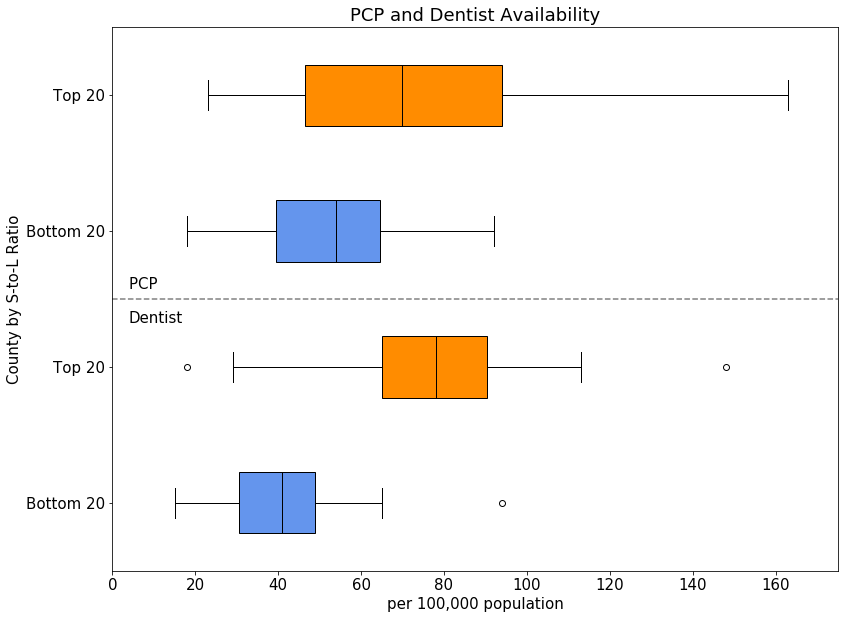

In [18]:

all_data = [trim_bottom_dentist['Dentist Rate'], trim_top_dentist['Dentist Rate'], 
            trim_bottom_PCP['PCP Rate'], trim_top_PCP['PCP Rate']]

plt.figure(figsize=(13,10))  
plt.rcParams.update({'font.size': 15})

boxplot = plt.boxplot(all_data, vert=False, patch_artist=True,labels=['Bottom 20','Top 20','Bottom 20','Top 20'])

colors = ['cornflowerblue', 'darkorange', 'cornflowerblue', 'darkorange']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
plt.setp(boxplot['medians'], color='black')    
# plt.ylabel('Dentist        PCP')
plt.ylabel('County by S-to-L Ratio')
plt.hlines(2.5, 0, 200, linestyles='dashed', colors='grey')
plt.text(4, 2.32, 'PCP \n\nDentist')
plt.xlabel('per 100,000 population')
plt.title('PCP and Dentist Availability')
plt.yticks()
plt.xlim(0,175)
plt.savefig("Plots/boxplot_PCP_Dentist_by_sale_list_ratio.png")

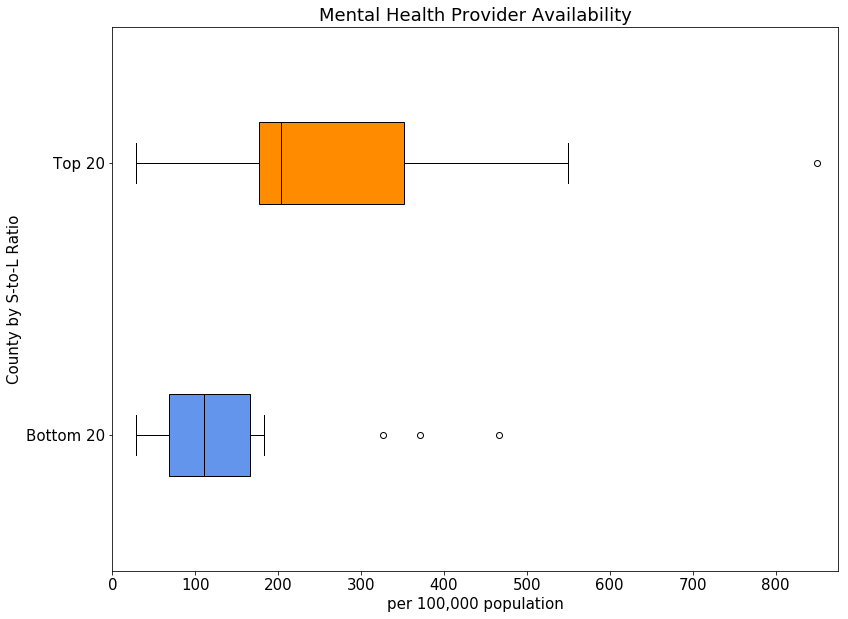

In [19]:
all_data_MHP = [trim_bottom_MHP['MHP Rate'], trim_top_MHP['MHP Rate']]

plt.figure(figsize=(13,10))  
plt.rcParams.update({'font.size': 15})

boxplot = plt.boxplot(all_data_MHP, vert=False, patch_artist=True,labels=['Bottom 20','Top 20'], widths=(0.3, 0.3))


colors = ['cornflowerblue', 'darkorange']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
plt.setp(boxplot['medians'], color='black')    
plt.ylabel('County by S-to-L Ratio')
plt.xlabel('per 100,000 population')
plt.title('Mental Health Provider Availability')
plt.yticks()
plt.xlim(0,875)
plt.savefig("Plots/boxplot_MHP_by_sale_list_ratio.png")

In [20]:

# all_data = [trim_bottom_MHP['MHP Rate'], trim_top_MHP['MHP Rate'], 
#             trim_bottom_dentist['Dentist Rate'], trim_top_dentist['Dentist Rate'], 
#             trim_bottom_PCP['PCP Rate'], trim_top_PCP['PCP Rate']]
# plt.rcParams.update({'font.size': 15})
# boxplot = plt.boxplot(all_data, vert=True, patch_artist=True,labels=['Top 20','\nBottom 20', 'Top 20','\nBottom 20', 'Top 20','\nBottom 20'])


# colors = ['peachpuff', 'cornflowerblue', 'peachpuff', 'cornflowerblue','peachpuff', 'cornflowerblue']
# for patch, color in zip(boxplot['boxes'], colors):
#     patch.set_facecolor(color)
    
# plt.xlabel('\nMHP     |     Dentist     |     PCP')
# plt.ylabel('per 100,000 population')
# plt.title('Average Health Provider Availability')
# plt.yticks()
# # plt.ylim(-20,875)

In [21]:

# all_data = [trim_bottom_dentist['Dentist Rate'], trim_top_dentist['Dentist Rate'], 
#             trim_bottom_PCP['PCP Rate'], trim_top_PCP['PCP Rate']]
# plt.rcParams.update({'font.size': 15})
# boxplot = plt.boxplot(all_data, vert=True, patch_artist=True,labels=['Top 20','\nBottom 20', 'Top 20','\nBottom 20'])


# colors = ['peachpuff', 'cornflowerblue','peachpuff', 'cornflowerblue']
# for patch, color in zip(boxplot['boxes'], colors):
#     patch.set_facecolor(color)
    
# plt.xlabel('\nDentist          PCP')
# plt.ylabel('per 100,000 population')
# plt.title('Average Health Provider Availability')
# plt.yticks()
# # plt.ylim(-20,875)

# Percent Uninsured

In [22]:
# Specific health factor 
uninsured_rate = health_factor_df[["County", "% Uninsured"]]

In [23]:
# Make merge for plotting
top_uninsured = pd.merge(top_county_clean, uninsured_rate, on='County', how='left')
bottom_uninsured = pd.merge(bottom_county_clean, uninsured_rate, on='County', how='left')

<BarContainer object of 20 artists>

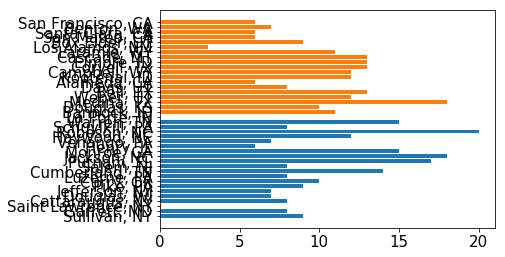

In [24]:
# Plot
plt.barh(bottom_uninsured['County'], bottom_uninsured['% Uninsured'])
plt.barh(top_uninsured['County'], top_uninsured['% Uninsured'])

In [25]:
all_uninsured = pd.merge(bottom_uninsured, top_uninsured, on=['County','% Uninsured'],how='outer')

trim_bottom_uninsured = bottom_uninsured.dropna()
trim_top_uninsured = top_uninsured.dropna()

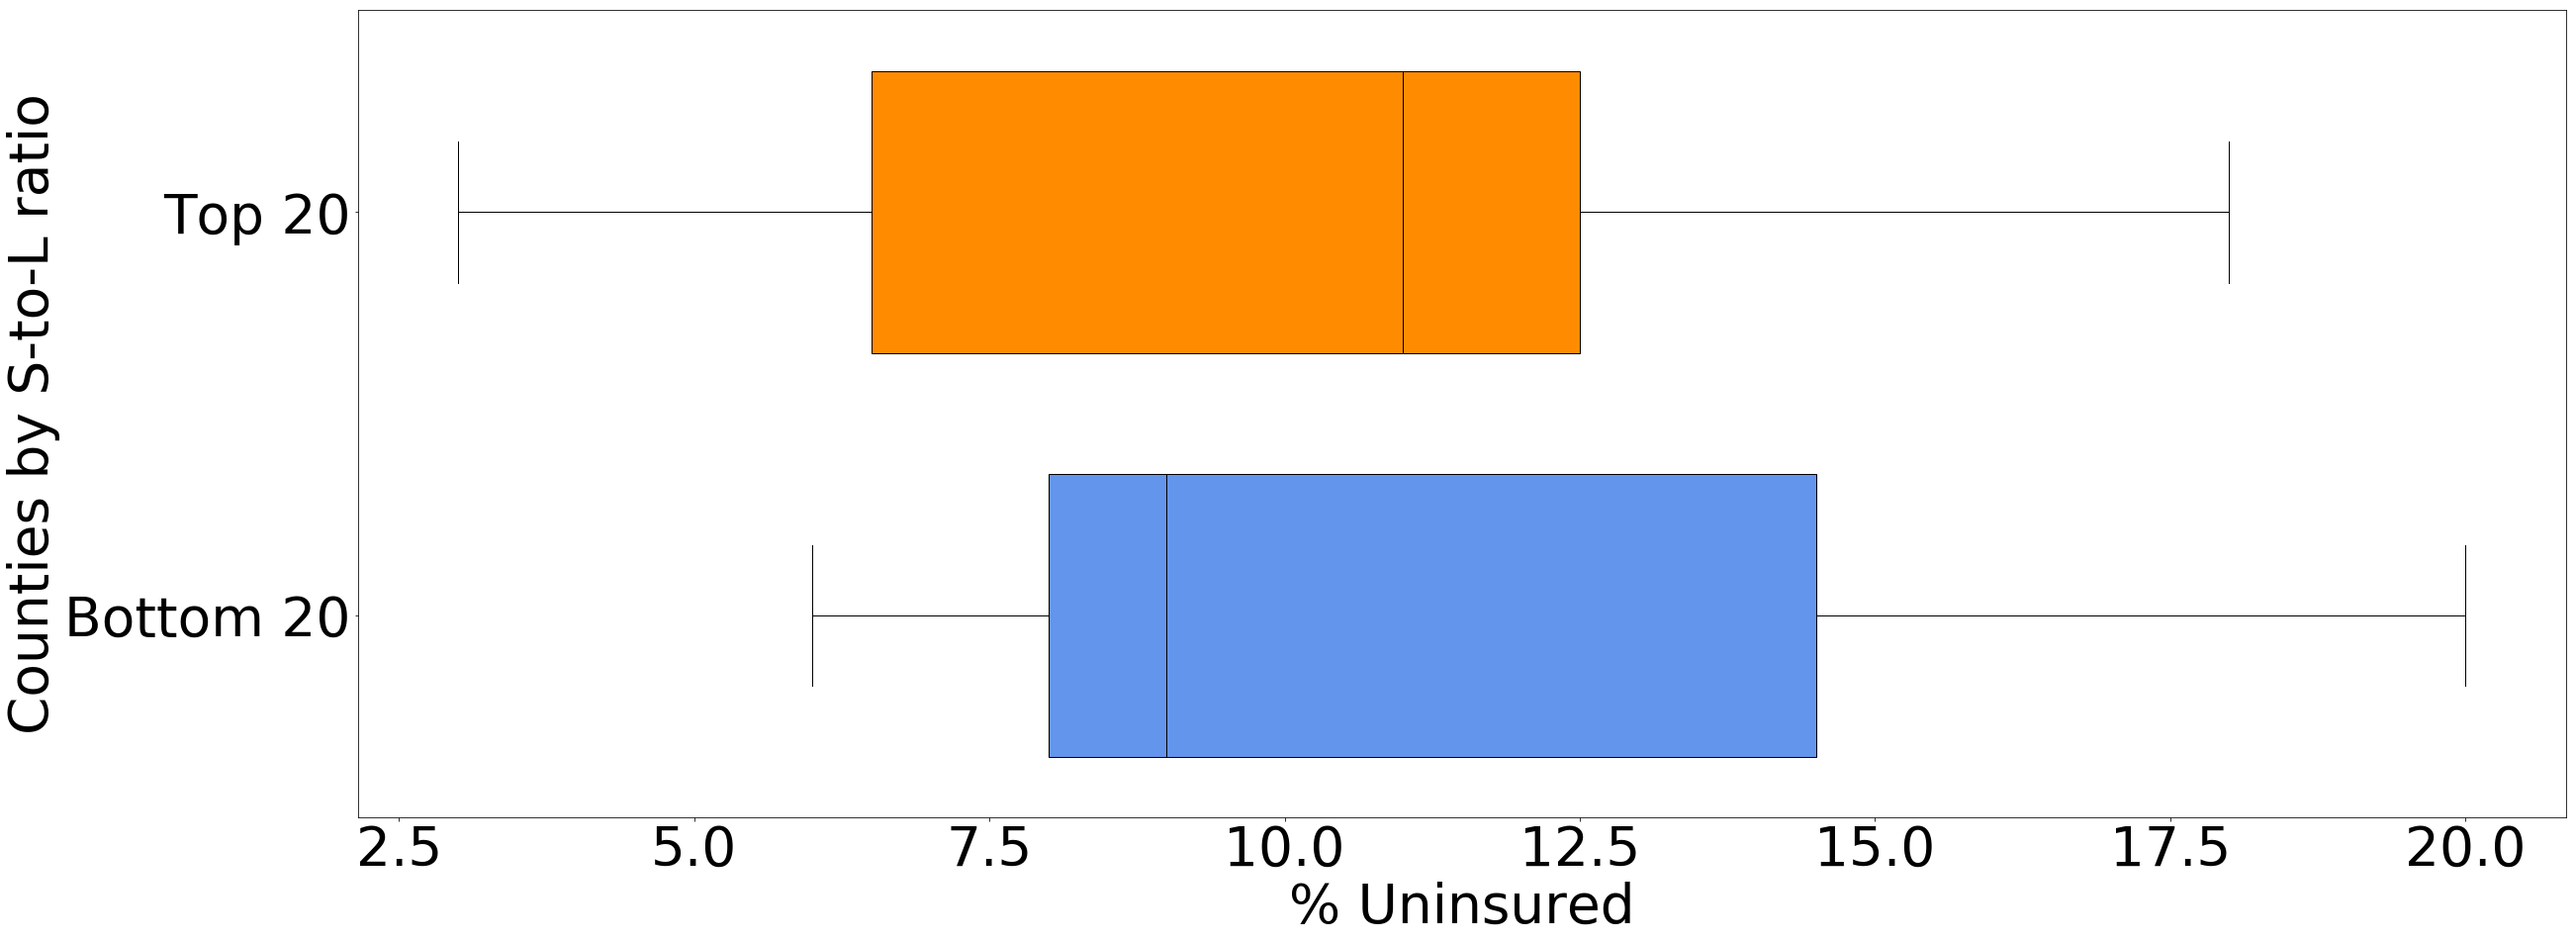

In [26]:
all_data_uninsured = [trim_bottom_uninsured['% Uninsured'], trim_top_uninsured['% Uninsured']]

plt.figure(figsize=(40,15))  
plt.rcParams.update({'font.size': 55})

boxplot = plt.boxplot(all_data_uninsured, vert=False, patch_artist=True,labels=['Bottom 20','Top 20'], widths=(0.70, 0.7))

colors = ['cornflowerblue', 'darkorange']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    
plt.setp(boxplot['medians'], color='black')    
plt.ylabel('Counties by S-to-L ratio')
plt.xlabel('% Uninsured')
# plt.title('% Uninsured')
plt.yticks()
# plt.xlim(-15,600)

plt.savefig("Plots/boxplot_uninsured_by_sale_list_ratio.png")